In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, Markdown
from pathlib import Path

data_dir = Path('learning-equality-curriculum-recommendations')

In [2]:
# load the data into pandas dataframes
topics_df = pd.read_csv(data_dir / "topics.csv", index_col=0).fillna({"title": "", "description": ""})
content_df = pd.read_csv(data_dir / "content.csv", index_col=0).fillna("")
correlations_df = pd.read_csv(data_dir / "correlations.csv", index_col=0)

In [3]:
# show a random sample of the topics from the topics dataframe
topics_df.sample(frac=1).head(10)

,title,description,channel,category,level,language,parent,has_content
id,,,,,,,,
t_b25117b31f72,Lección 7 Embarazo y adolescencia,,54971d,aligned,5,es,t_4c69474fb0c1,True
t_2aaab61d917d,Finding amplitude and midline of sinusoidal fu...,Learn how to find the amplitude and the midlin...,0ec697,source,4,en,t_4ec0525ac9f8,True
t_594e0d18ee70,Formal definition of limits (optional),The epsilon-delta definition of a limit is not...,2ee29d,aligned,4,en,t_d7f0401bcd0d,True
t_b6e44a2beecc,দৈর্ঘ্যের পরিমাপ,স্কেল ও বর্গ একক ব্যবহার করে দৈর্ঘ্য পরিমাপ কর...,e6bdbc,source,4,bn,t_0045860ed294,True
t_4a3e3cb7f9b2,Playing with numbers,,7f116c,supplemental,4,en,t_5d8d9af6efeb,False
t_f030b2e708fa,"The unit circle definition of sine, cosine, an...",Learn about the ingenious way in which we defi...,0ec697,source,4,en,t_6e9ced8bf9e9,True
t_03e1af0e86f2,Dilution,"When companies issue new shares, many people c...",2ee29d,aligned,4,en,t_3d603b1cdf32,True
t_bc729fbb916d,Draw with Bush Baby,,14d190,aligned,7,en,t_d9a908463a64,True
t_df47045b899e,দশমিককে ভগ্নাংশ হিসেবে লেখা,কীভাবে দশমিককে ভগ্নাংশ হিসেবে পুনরায় লেখা যায় ...,e6bdbc,source,4,bn,t_d1127419de4f,True


In [4]:
# show a random sample of the content from the content dataframe
content_df.sample(frac=1).head(10)

,title,description,kind,text,language,copyright_holder,license
id,,,,,,,
c_ff0f7c51f410,9.4.1.L14.pdf,9.4.1.L14.pdf,document,NYS Common Core ELA & Literacy Curriculum\n\n9...,es,Engage NY,CC BY-NC-SA
c_c59a8b8c6ba4,¿Cómo se hace un regate clásico?,Con este tutorial aprenderás a hacer un regate...,document,\n¿Cómo se hace un regate clásico?\nCon este ...,es,Sikana Education,CC BY-NC-ND
c_366af0114d7f,Сметки с Лоренцови трансформации,Ще разгледаме пример с Лоренцова трансформация...,video,Нека разровим малко по-надълбоко в трансформац...,bg,Khan Academy,CC BY-NC-SA
c_c861b6148a04,Abonnement au yoga : résoudre l'équation,"La suite ! Maintenant, on résout les équations...",video,,fr,,
c_7c062611d419,Documento 4,¡Esta guía complementaria está diseñada como u...,document,Kindergarten\n\nCore Knowledge Language Arts® ...,es,Engage NY,CC BY-NC-SA
c_074a8e1a634f,Deducción intuitiva de la Keq,Un intento más concreto para demostrar cómo la...,video,,es,,
c_67062c984c38,Concepto de negocio,Explore los tipos de gráficos que puede usar p...,html5,PD_BC_ES2\n\nDrag up for fullscreen,es,HP LIFE,CC BY
c_aee1673e8cec,मूलों के योग और गुणनफल से अज्ञातों को ज्ञात कर...,जब मूलों के बीच का एक संबंध दिया गया होता है त...,exercise,,hi,,
c_7c1931294fd2,Introduction: Me and Myself in a Group,,html5,,en,,


In [5]:
# top languages by number of topics
topics_df.language.value_counts().sort_values(ascending=False).head(10)

en    36161
es    13910
pt     4177
ar     3701
fr     3701
bg     2867
sw     2860
gu     2320
bn     2176
hi     1786
Name: language, dtype: int64

In [6]:
# top languages by number of content items
content_df.language.value_counts().sort_values(ascending=False).head(10)

en    65939
es    30844
fr    10682
pt    10435
ar     7418
bg     6050
hi     4042
zh     3849
gu     3677
bn     2513
Name: language, dtype: int64

In [7]:
# numbers of different types of content
content_df.kind.value_counts().sort_values(ascending=False).head(10)

video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: kind, dtype: int64

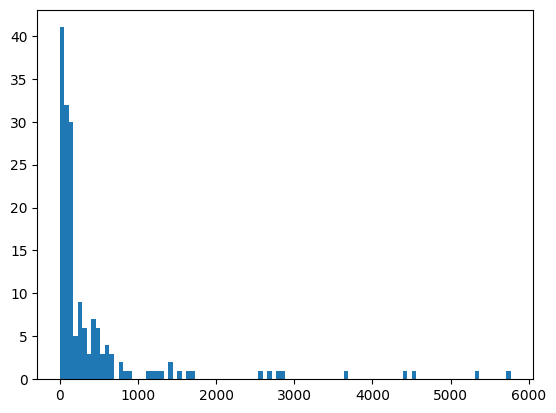

In [8]:
# sizes of different channels (in terms of numbers of topics)
plt.hist(topics_df.channel.value_counts(), bins=100)
plt.show()

In [9]:
# define some helper functions and classes to aid with data traversal

from utils import print_markdown
from utils import Topic
from utils import ContentItem


In [10]:
t = Topic(topics_df.index[33])
print_markdown("\n#### Title:")
print(t.title)
print()
print_markdown("#### Description:")
print(t.description)
print()
print_markdown("#### Breadcrumbs:")
print(t.get_breadcrumbs())
print()
print_markdown("#### Parent:")
print(t.parent)
print()
print_markdown("#### Siblings:")
print(t.siblings)
print()
print_markdown("#### Children:")
print(t.children)
print()
print_markdown("#### Content:")
print(t.content)
print()
if t.content:
    print_markdown("#### All breadcrumbs for first content item:")
    print_markdown("- " + "\n- ".join(t.content[0].get_all_breadcrumbs()))


#### Title:

Lección 2



#### Description:

#### Breadcrumbs:

CREE >> Para el Estudiante >> I Ciclo >> 02 Segundo >> Español Actvidades 2do >> Unidad 1 >> Lección 2



#### Parent:

Unidad 1



#### Siblings:

[<Topic(id=t_845ee242d2b4, title="Lección 3")>, <Topic(id=t_85037a830baf, title="Lección 5")>, <Topic(id=t_95dd68c2ce5b, title="Lección 1")>, <Topic(id=t_a4e7c3871a3a, title="Lección 8")>, <Topic(id=t_e97f66f484ce, title="Lección 4")>, <Topic(id=t_ef45840f03ca, title="Lección 7")>, <Topic(id=t_fac6db0b5079, title="Lección 6")>]



#### Children:

[]



#### Content:

[<ContentItem(id=c_e7e44cb2c32d, title="Siguiendo instrucciones")>]



#### All breadcrumbs for first content item:

- CREE >> Para el Estudiante >> I Ciclo >> 02 Segundo >> Español Actvidades 2do >> Unidad 1 >> Lección 2 >> Siguiendo instrucciones
- CREE >> Para el Docente >> I Ciclo >> 02 Segundo >> Español GD 2do >> Unidad 1 >> Lección 2 >> Siguiendo instrucciones

In [11]:
# display a topic's subtree and associated content titles as a nested markdown list
t = Topic("t_36fd07ff5d96")
# (we truncate the output to 35 lines here to avoid overwhelming the notebook)
print_markdown("\n".join(t.subtree_markdown().split("\n")[:35]))

- Mortgages
  - [Video] Modéliser avec la somme des termes d'une suite géométrique - exemple 2


count    61517.000000
mean         4.550271
std          6.700255
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        293.000000
dtype: float64

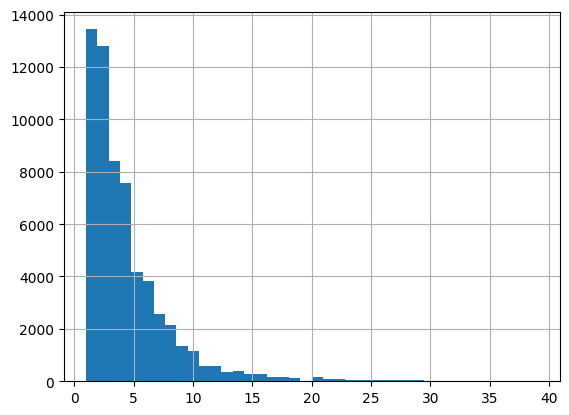

In [12]:
# how many content items are correlated with each topic?
content_per_topic = pd.Series([len(cids.split()) for cids in correlations_df.content_ids])
content_per_topic[content_per_topic < 40].hist(bins=40)
content_per_topic.describe()